In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data = pd.read_csv(r"C:\Users\hp\Downloads\Summer-Olympic-medals-1976-to-2008.csv", encoding='latin-1')

In [3]:
#dataset
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:
#check shape,datatype and rows and columns
data.info()
data.columns
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [5]:
data.shape

(15433, 11)

In [6]:
#check missing values
data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [7]:
#drop the missing values
data = data.dropna()

In [8]:
#check again missing values after dropping
data.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [9]:
#after removing nullvalues/missing values
data.shape

(15316, 11)

In [10]:
print(data.columns)

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')


In [11]:
#drop unwanted columns
data = data.drop(['Country_Code'], axis=1)

In [12]:
#check unique columns
print(data.Event_gender.unique())
print(data.Gender.unique())

['W' 'M' 'X']
['Women' 'Men']


In [13]:
#drop eventgender as having unique as gender
data = data.drop(['Event_gender'], axis=1)

In [14]:
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [15]:
#check the duplicate rows
data.duplicated().sum()

1

In [16]:
#find duplicate rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15428    False
15429    False
15430    False
15431    False
15432    False
Length: 15316, dtype: bool

In [17]:
#show duplicate rows
data[data.duplicated()]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
2320,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,India,Gold


In [18]:
#drop the duplicate rows
data = data.drop_duplicates()

In [19]:
#drop the duplicate rows
data = data.drop_duplicates()

In [20]:
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


In [21]:
#print the data
data.shape

(15315, 9)

In [22]:
#statistics
data.describe()

,Year
count,15315.000000
mean,1993.621678
std,10.159586
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [23]:
#Total medal count by country
data.groupby('Country')['Medal'].count().sort_values(ascending=False)

Country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
                 ... 
Panama              1
Senegal             1
Sri Lanka           1
Sudan               1
Macedonia           1
Name: Medal, Length: 127, dtype: int64

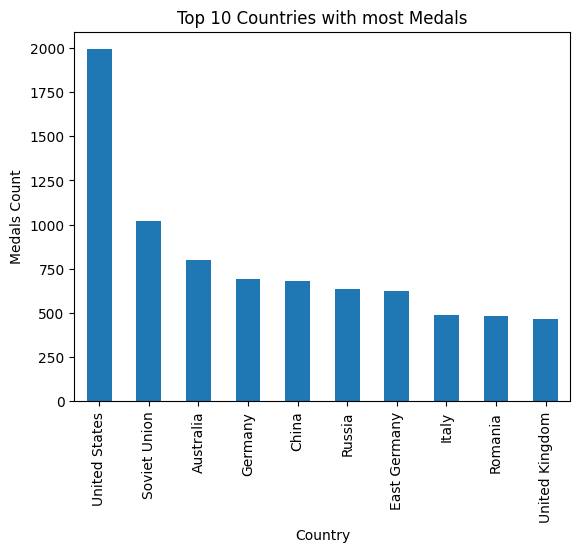

In [24]:
#plot the above analysis for top 10 countries
top_10_countries = data.groupby('Country')['Medal'].count().sort_values(ascending=False).head(10)
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries with most Medals')
plt.xlabel('Country')
plt.ylabel('Medals Count')
plt.show()

In [25]:
# Grouping years over the medal
data.groupby('Year')['Medal'].count().sort_values(ascending=False)

Year
2008.0    2042
2000.0    2015
2004.0    1998
1996.0    1859
1992.0    1705
1988.0    1546
1984.0    1459
1980.0    1386
1976.0    1305
Name: Medal, dtype: int64

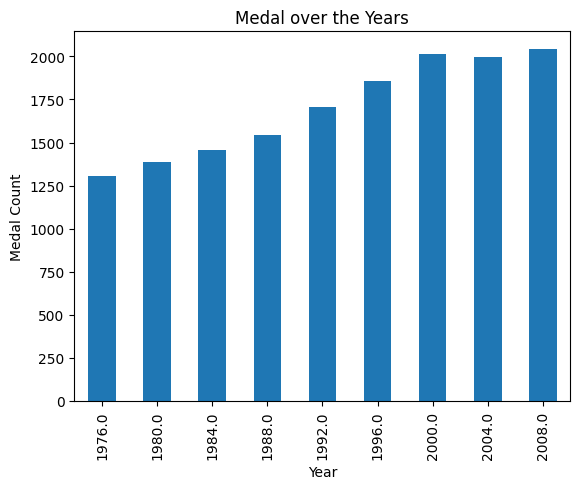

In [26]:
#Plot the above analysis
data.groupby('Year')['Medal'].count().plot(kind='bar')
plt.title('Medal over the Years')
plt.xlabel('Year')
plt.ylabel("Medal Count")
plt.show()

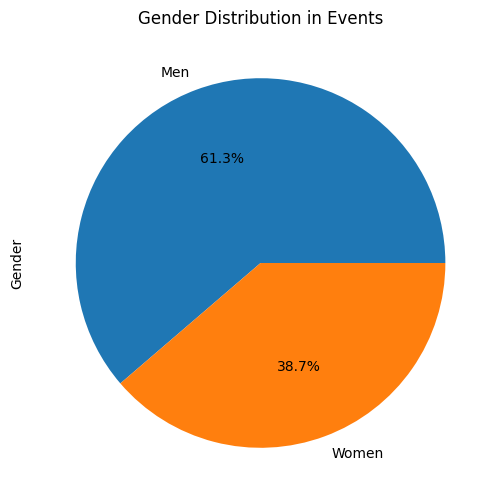

In [27]:
#Gender distribution in events
gender_distribution = data['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Gender Distribution in Events')
plt.show()

In [28]:
#Groupby Athlete with medal
data.groupby('Athlete')['Medal'].value_counts().sort_values(ascending=False)

Athlete                   Medal 
PHELPS, Michael           Gold      14
LEWIS, Carl               Gold       9
THOMPSON, Jenny           Gold       8
BIONDI, Matthew           Gold       8
FISCHER, Birgit           Gold       8
                                    ..
HUBACKOVA, Ida            Silver     1
HUBBARD, Phillip Gregory  Gold       1
HUBBLE, Philip            Silver     1
HUBER, Thomas             Bronze     1
ÖRSTED, Hans-Henrik       Bronze     1
Name: Medal, Length: 13273, dtype: int64

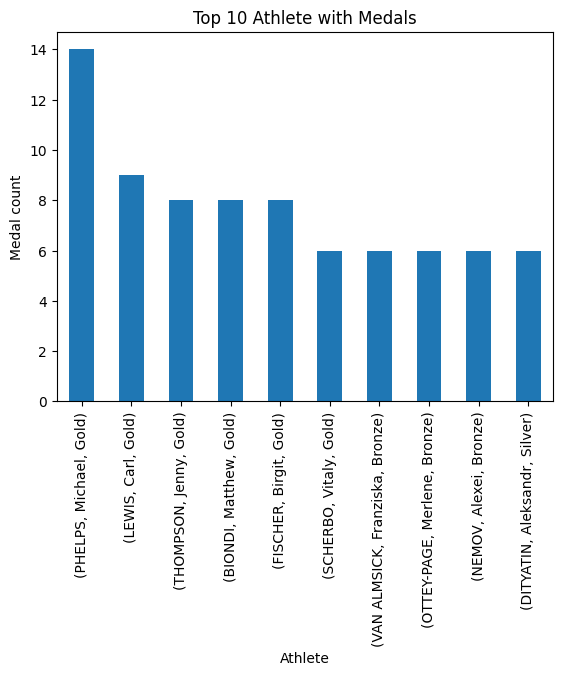

In [29]:
#plot the above
data.groupby('Athlete')['Medal'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Athlete with Medals')
plt.xlabel('Athlete')
plt.ylabel('Medal count')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
#convert categorical data in to numerical : Gender, Sport, Medal
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Sport'] = label_encoder.fit_transform(data['Sport'])


In [32]:
data['Medal'] = data['Medal'].map({'Gold':1, 'Silver':2, 'Bronze':3, np.nan:0})

In [33]:
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976.0,0,Diving,3m springboard,"KÖHLER, Christa",1,East Germany,2
1,Montreal,1976.0,0,Diving,3m springboard,"KOSENKOV, Aleksandr",0,Soviet Union,3
2,Montreal,1976.0,0,Diving,3m springboard,"BOGGS, Philip George",0,United States,1
3,Montreal,1976.0,0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",0,Italy,2
4,Montreal,1976.0,0,Diving,10m platform,"WILSON, Deborah Keplar",1,United States,3


In [34]:
# Define X and Y
X = data[['Gender','Sport']]
y = data['Medal']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.3434541299379693
Confusion Matrix:
 [[   0    0 1008]
 [   0    0 1003]
 [   0    0 1052]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1008
           2       0.00      0.00      0.00      1003
           3       0.34      1.00      0.51      1052

    accuracy                           0.34      3063
   macro avg       0.11      0.33      0.17      3063
weighted avg       0.12      0.34      0.18      3063



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [37]:
#Logistic Regression with Year
X = data[['Gender','Sport']]
y = data['Year']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.1403852432255958
Confusion Matrix:
 [[  0   0   0  27   0   0 106   0 128]
 [  0   0   0  28   0   0 109   0 140]
 [  0   0   0  27   0   0 117   0 148]
 [  0   0   0  32   0   0 117   0 160]
 [  0   0   0  30   0   0 121   0 190]
 [  0   0   0  33   0   0 143   0 196]
 [  0   0   0  27   0   0 154   0 222]
 [  0   0   0  30   0   0 154   0 216]
 [  0   0   0  33   0   0 131   0 244]]
Classification Report:
               precision    recall  f1-score   support

      1976.0       0.00      0.00      0.00       261
      1980.0       0.00      0.00      0.00       277
      1984.0       0.00      0.00      0.00       292
      1988.0       0.12      0.10      0.11       309
      1992.0       0.00      0.00      0.00       341
      1996.0       0.00      0.00      0.00       372
      2000.0       0.13      0.38      0.20       403
      2004.0       0.00      0.00      0.00       400
      2008.0       0.15      0.60      0.24       408

    accuracy                

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu